LT4 MASTER REVIEWER- https://docs.google.com/document/d/1ZGFp5LS4fvFhAdrG_6DH3-iWyi3O2R8UO4BpSf-j5Ug/edit

# Notebook 2: On k-Nearest Neighbor (kNN) Regression

Organized and prepared by: Christopher Monterola

This notebook was conceptualized, organized and prepared for the **Machine Learning 1** course as part of the MS in Data Science offering.

### This notebook used the following reference:

Introduction to Machine Learning with Python, A. Mueller and S. Guido, O'Reilly 2017

# General Idea 

Unlike the previous section that entails **classifying** the data on various class labels, **kNN regression** is concerned in predicting a continuous number, or a floating-point number (term used by data scientists, computer scientist) or real number (term used by mathematicians).

Similar to kNN classifier, kNN regression is a *non-parametric* and *instance-based* learning algorithm. 

The notebook is accompanied by sample illustrations to elucidate the concept of kNN regression when it is used for periodic, aperiodic and/or sparse data. I also demonstrate here how to implement kNN to forecast Parkinson's disease and bike sharing counts, both examples are anchored on real world data.



In [1]:
# !pip install mglearn

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.neighbors import KNeighborsClassifier
import mglearn #library provided by amueller
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Illustration 1: The wave dataset
To illustrate regression algorithms, we will use the synthetic **wave dataset** shown
below. The wave dataset only has a single input feature, and a continuous target
variable (or response) that we want to model.
The plot below is showing the single feature on the x-axis, with the data points as <font color = orange> orange </font> dots. For each data point, the target output is plotted in <font color = blue> blue </font> on the y-axis.

Text(0, 0.5, 'Target')

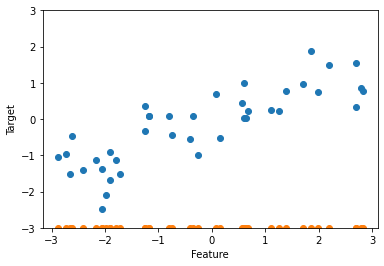

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.plot(X, -3 * np.ones(len(X)), 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [4]:
y

array([-0.44822073,  0.33122576,  0.77932073,  0.03497884, -1.38773632,
       -2.47196233, -1.52730805,  1.49417157,  1.00032374,  0.22956153,
       -1.05979555,  0.7789638 ,  0.75418806, -1.51369739, -1.67303415,
       -0.90496988,  0.08448544, -0.52734666, -0.54114599, -0.3409073 ,
        0.21778193, -1.12469096,  0.37299129,  0.09756349, -0.98618122,
        0.96695428, -1.13455014,  0.69798591,  0.43655826, -0.95652133,
        0.03527881, -2.08581717, -0.47411033,  1.53708251,  0.86893293,
        1.87664889,  0.0945257 , -1.41502356,  0.25438895,  0.09398858])

Similar to kNN classification, we start by using a single nearest neighbor, this time using the wave dataset. Shown below are the predictions by one-nearest-neighbor regression on the wave data set, we added three test data points as <font color = green> green </font> crosses on the x axis. 

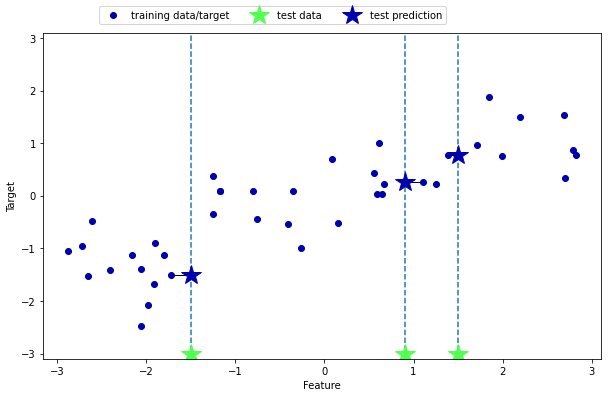

In [5]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

Next we show the prediction using three-nearest-neighbor regression on the wave data set, again we have added three test data points as <font color = green> green </font> crosses on the x axis.

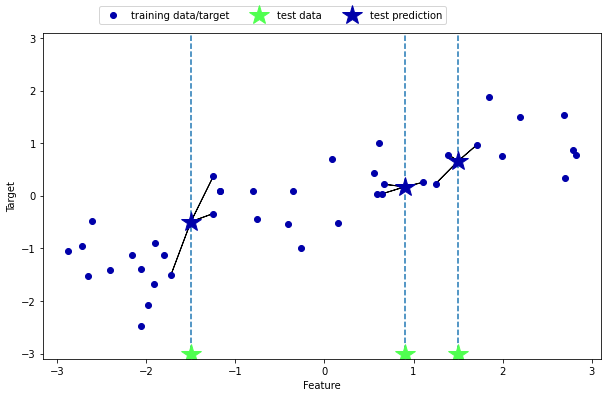

In [6]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

The **kNN** algorithm for regression is implemented in the $Neighbors
Regressor$ class in scikit-learn. It looks much like the $KNeighborsClassifier$ above:

In [7]:
from sklearn.neighbors import KNeighborsRegressor

#Step 1: get the Data
X, y = mglearn.datasets.make_wave(n_samples=40) 

#Step 2: split the data (wave dataset) into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

#Step 3: Instantiate the model, define the learning parameter, say number of neighbors = 3:
reg = KNeighborsRegressor(n_neighbors=3)

#Step 4: Fit the model using the training data and training targets:
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

Let's look at the data X and y.

In [8]:
X[0:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [9]:
y[0:5]

array([-0.44822073,  0.33122576,  0.77932073,  0.03497884, -1.38773632])

Now, we can make predictions on the test set:

In [10]:
#Step 5: Prediction
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

We can also evaluate the model using the score method, which for regressors returns
the $R^2$ score.
The $R^2$ score, also known as coefficient of determination, is a measure of goodness
of a prediction for a regression model, and yields a score up to 1. A value of 1
corresponds to a perfect prediction, and a value of 0 corresponds to a constant model
that just predicts the mean of the training set responses y_train. Note that $R^2$ can be negative.

\begin{equation}
R^2=1 -\sum_i\frac{(y_i -f_i)^2}{(y_i - \bar{y})^2}
\end{equation}

where $y_i$ is the actual value, $f_i$ is the predicted value and $\bar{y}$ is the mean of ${y_i}$.

In [11]:
#Step 6: Evaluation the R2
reg.score(X_test, y_test)

0.8344172446249605

Here, the score is 0.83 which indicates a relatively good model fit.

### Analyzing k nearest neighbors regression

For our one-dimensional dataset, we can see what the predictions look like for all
possible feature values. To do this, we create a test-dataset consisting of many points
on the line.

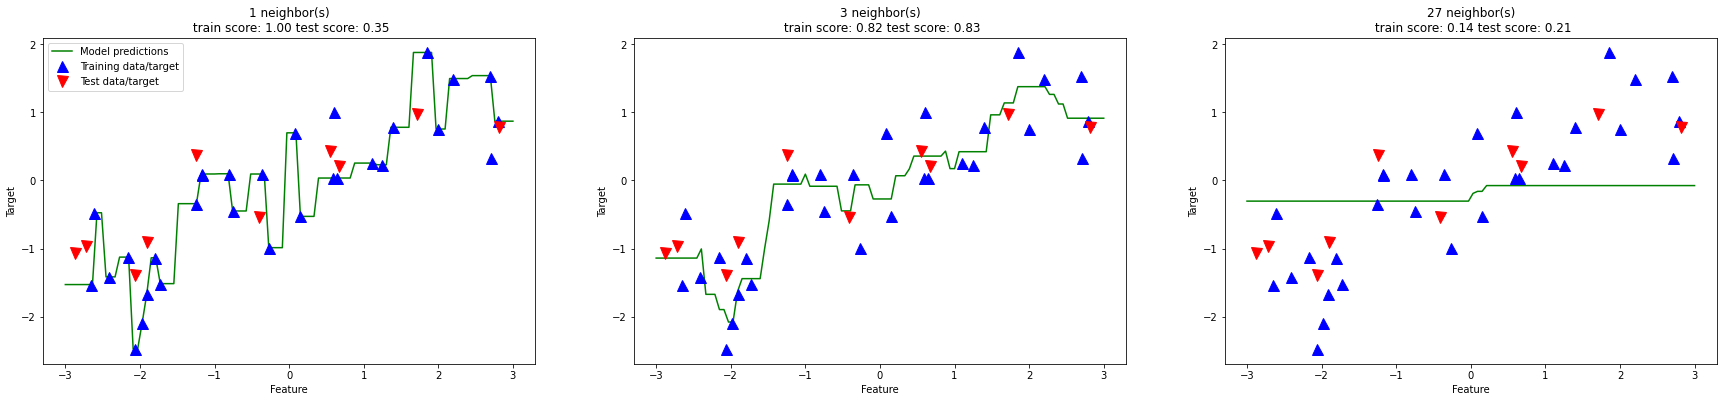

In [12]:


fig, axes = plt.subplots(1, 3, figsize=(30, 6))
line = np.linspace(-3, 3, 100).reshape(-1, 1) # create 100 data points, evenly spaced between -3 and 3
for n_neighbors, ax in zip([1, 3, 27], axes): # make predictions using 1, 3 or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train) 
    #ax.plot(X, y, 'v',c=mglearn.cm2(1))
    ax.plot(line, reg.predict(line), c='green') #plot the predicted value = boundary decision
    ax.plot(X_train, y_train,'^',c='blue',markersize=11) #plot the training set as triangle, blue = mglearn.cm2(0)
    ax.plot(X_test, y_test,'v',c='red',markersize=11) #plot the test set as inverted triangle, red =mglearn.cm2(1) 
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,reg.score(X_train, y_train),
                                                                         reg.score(X_test,y_test)))    
    ax.set_xlabel("Feature")  
    ax.set_ylabel("Target")         
axes[0].legend(["Model predictions","Training data/target","Test data/target"],loc='best')
pass

The <font color=green> green line </font>is the prediction made by the model for all points on the line. 

Using only a single neighbor, each point in the training set has an obvious influence
on the predictions, and the predicted values go through all of the data points. This
leads to a very unsteady prediction. 

Considering more neighbors leads to smoother predictions, but these do not fit the training data as well.

Let's scan the accuracy as a function of *n_neighbor* for one instant of training:test combination.

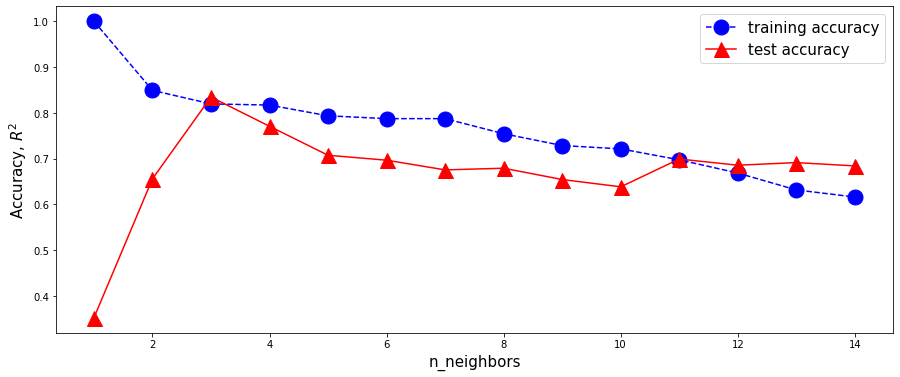

In [13]:


X, y = mglearn.datasets.make_wave(n_samples=40) # split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
training_accuracy = []  
test_accuracy = []
neighbors_settings = range(1, 15) # try n_neighbors from 1 to 10

for n_neighbors in neighbors_settings:   
    reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model 
    reg.fit(X_train, y_train) #clf = KNeighborsClassifier(n_neighbors=n_neighbors    
    training_accuracy.append(reg.score(X_train, y_train)) # record training set accuracy  
    test_accuracy.append(reg.score(X_test, y_test)) # record generalization accuracy    
fig = plt.figure(figsize=(15, 6))
import pylab as plot
params = {'legend.fontsize': 15, 'legend.handlelength': 2}

plot.rcParams.update(params)

plt.plot(neighbors_settings, training_accuracy, label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=15)
plt.plot(neighbors_settings, test_accuracy, label="test accuracy",color='red', marker='^', linestyle='-', markersize=15)
plt.ylabel("Accuracy, $R^2$", fontsize=15)
plt.xlabel("n_neighbors",fontsize=15)
plt.legend()
pass

Let's make the above example more robust by scanning the accuracy as a function of *n_neighbors* over 100 different training:test combinations.

In [14]:


all_training = pd.DataFrame()
all_test = pd.DataFrame()
for seedN in range(1,100,1):
    X, y = mglearn.datasets.make_wave(n_samples=40) # split the wave dataset into a training and a test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seedN)
    training_accuracy = []  
    test_accuracy = []
    neighbors_settings = range(1, 30) # try n_neighbors from 1 to 10

    for n_neighbors in neighbors_settings:   
        reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model 
        reg.fit(X_train, y_train) #clf = KNeighborsClassifier(n_neighbors=n_neighbors    
        training_accuracy.append(reg.score(X_train, y_train)) # record training set accuracy  
        test_accuracy.append(reg.score(X_test, y_test)) # record generalization accuracy    
    all_training[seedN]=training_accuracy
    all_test[seedN] = test_accuracy

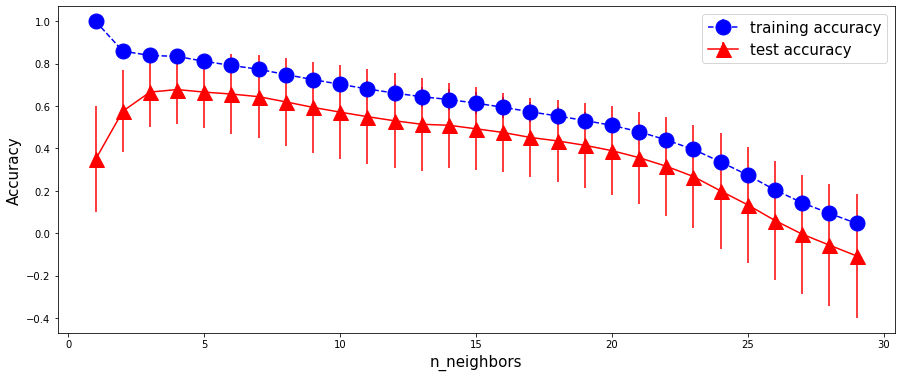

In [15]:


fig = plt.figure(figsize=(15, 6))
import pylab as plot
params = {'legend.fontsize': 15, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(neighbors_settings, all_training.mean(axis=1),
             yerr=all_training.std(axis=1), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=15)
plt.errorbar(neighbors_settings, all_test.mean(axis=1),
             yerr=all_test.std(axis=1), label="test accuracy", color='red', marker='^', linestyle='-', markersize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xlabel("n_neighbors",fontsize=15)
plt.legend()

1. Comment on the optimal *n_neighbors*.
2. What will happen when *n_neighbors* will include most of the data.

# Illustration 2.  A periodic signal

Consider a Cosine signal, what is the optimal **n_neighbors** to properly interpolate or extrapolate this time series.

Text(0, 0.5, 'Target')

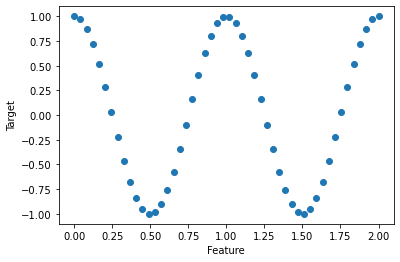

In [16]:


X = np.linspace(0.0, 2.0, 50) # range of X is from 0 to 2 create 50 data points
y = np.cos(2 * np.pi * X)  # Cos (2 pi X)


plt.plot(X, y, 'o')
plt.ylim(-1.1, 1.1)
plt.xlabel("Feature")
plt.ylabel("Target")

In [17]:


X.shape

(50,)

In [18]:


from numpy import array
XX=np.reshape(X, (len(X),-1))  #Reshape the list to array

In [19]:


XX.shape

(50, 1)

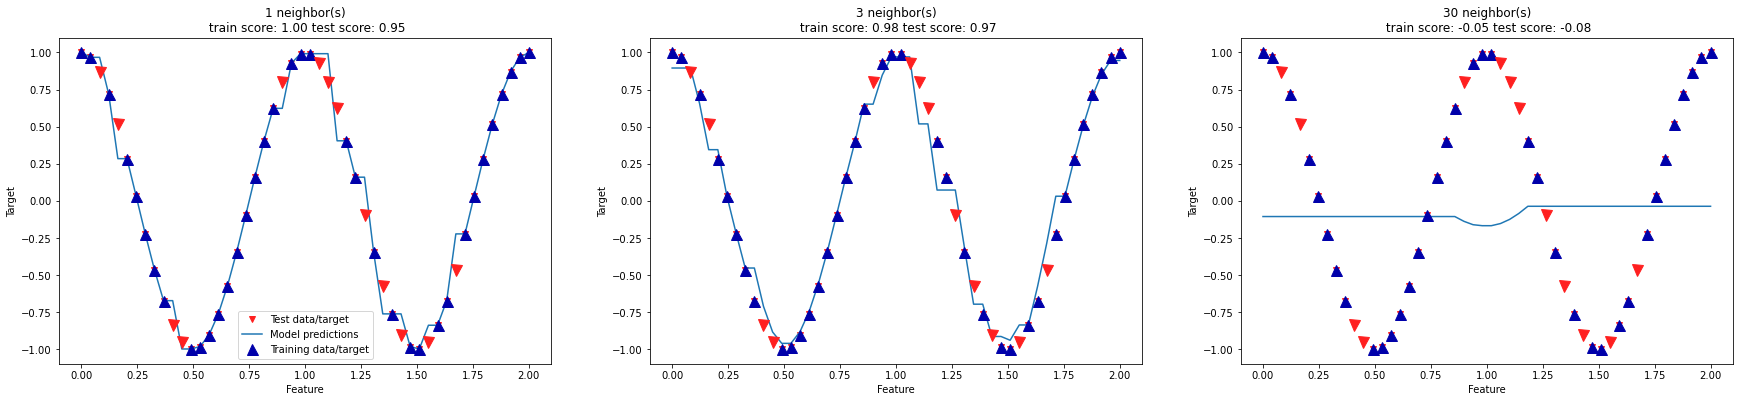

In [20]:


X_train, X_test, y_train, y_test = train_test_split(XX, y, random_state=0)
fig, axes = plt.subplots(1, 3, figsize=(30, 6)) 
line = np.linspace(0, 2, 50).reshape(50, -1) # create 50 data points, evenly spaced between 0 and 2

#plt.suptitle("nearest_neighbor_regression")
import pylab as plot
params = {'legend.fontsize': 10, 'legend.handlelength': 2}
plot.rcParams.update(params)
for n_neighbors, ax in zip([1, 3, 30], axes): # make predictions using 1, 3 or 9 neighbors\
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(X, y, 'v',c=mglearn.cm2(1))
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train,'^',c=mglearn.cm2(0),markersize=11)
    ax.plot(X_test, y_test,'v',c=mglearn.cm2(1),markersize=11)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,reg.score(X_train, y_train),
                                                                         reg.score(X_test,y_test)))    
    ax.set_xlabel("Feature")  
    ax.set_ylabel("Target")         
axes[0].legend(["Test data/target","Model predictions","Training data/target"],loc='lower center')
pass

In [21]:


lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,100,1):
    X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.25, random_state=seedN)
    training_accuracy = []  
    test_accuracy = []
    neighbors_settings = range(1, 30) # try n_neighbors from 1 to 10

    for n_neighbors in neighbors_settings:   
        reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model 
        reg.fit(X_train, y_train) #clf = KNeighborsClassifier(n_neighbors=n_neighbors    
        training_accuracy.append(reg.score(X_train, y_train)) # record training set accuracy  
        test_accuracy.append(reg.score(X_test, y_test)) # record generalization accuracy    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

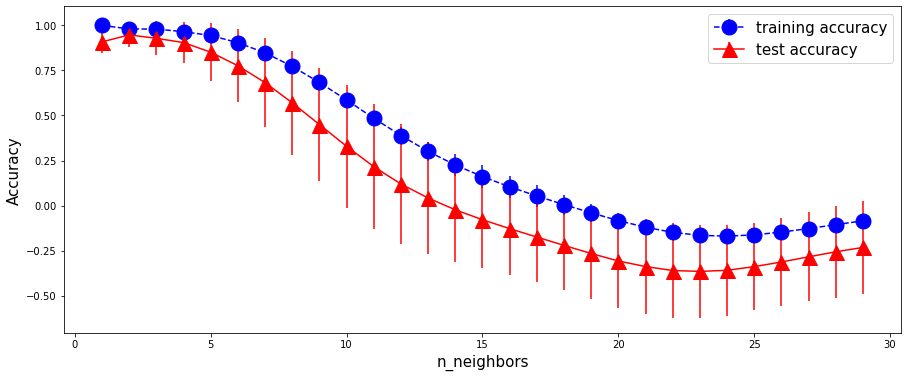

In [22]:


fig = plt.figure(figsize=(15, 6))
import pylab as plot
params = {'legend.fontsize': 15, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=15)
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1), label="test accuracy", color='red', marker='^', linestyle='-', markersize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xlabel("n_neighbors",fontsize=15)
plt.legend()

# Illustration 3.  A periodic but decaying signal

Consider a Cosine signal, what is the optimal n_neighbor to properly interpolate or extrapolate this time series.

Text(0, 0.5, 'Target')

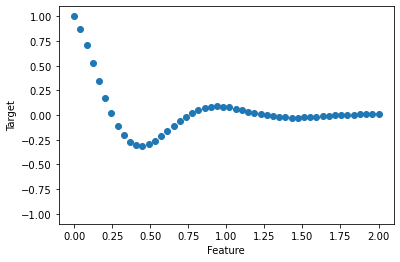

In [23]:


X = np.linspace(0.0, 2.0 , 50)
extra=np.linspace(0.0, 5.0, 50)
y = np.cos(2 * np.pi * X)* np.exp(-extra)


plt.plot(X, y, 'o')
plt.plot(X, -3 * np.ones(len(X)), 'o')
plt.ylim(-1.1, 1.1)
plt.xlabel("Feature")
plt.ylabel("Target")

In [24]:
from numpy import array
XX=np.reshape(X, (len(X),-1))

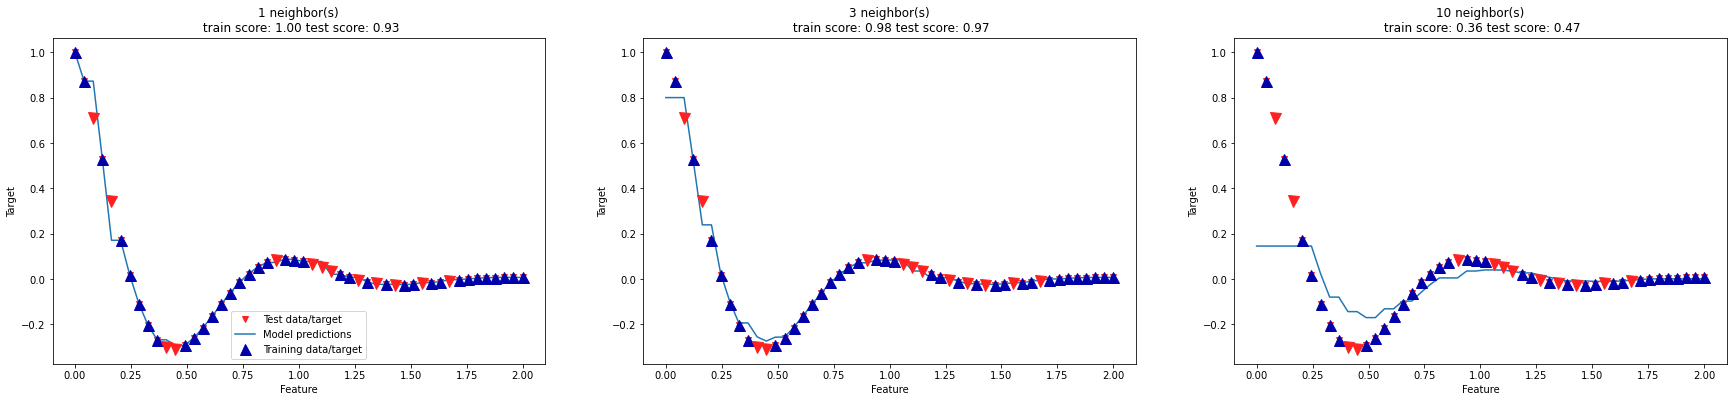

In [25]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, random_state=0)
fig, axes = plt.subplots(1, 3, figsize=(30, 6))
line = np.linspace(0, 2, 50).reshape(50, -1)  # create 1000 data points, evenly spaced between -3 and 3
import pylab as plot #plt.suptitle("nearest_neighbor_regression")
params = {'legend.fontsize': 10, 'legend.handlelength': 2}
plot.rcParams.update(params)
for n_neighbors, ax in zip([1, 3, 10], axes): # make predictions using 1, 3 or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(X, y, 'v',c=mglearn.cm2(1))
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train,'^',c=mglearn.cm2(0),markersize=11)
    ax.plot(X_test, y_test,'v',c=mglearn.cm2(1),markersize=11)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,reg.score(X_train, y_train),
                                                                         reg.score(X_test,y_test)))    
    ax.set_xlabel("Feature")  
    ax.set_ylabel("Target")         
axes[0].legend(["Test data/target","Model predictions","Training data/target"],loc='lower center')
pass

In [26]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,100,1):
    X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.25, random_state=seedN)
    training_accuracy = []  
    test_accuracy = []
    neighbors_settings = range(1, 30) # try n_neighbors from 1 to 10

    for n_neighbors in neighbors_settings:   
        reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model 
        reg.fit(X_train, y_train) #clf = KNeighborsClassifier(n_neighbors=n_neighbors    
        training_accuracy.append(reg.score(X_train, y_train)) # record training set accuracy  
        test_accuracy.append(reg.score(X_test, y_test)) # record generalization accuracy    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

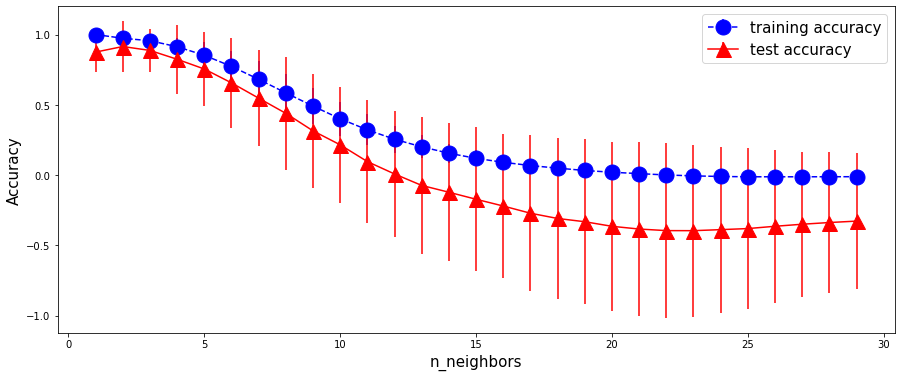

In [27]:
fig = plt.figure(figsize=(15, 6))
import pylab as plot
params = {'legend.fontsize': 15, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=15)
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1), label="test accuracy", color='red', marker='^', linestyle='-', markersize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xlabel("n_neighbors",fontsize=15)
plt.legend()

# Illustration 4.  Undersampled periodic signal

Consider a Cosine signal, what is the optimal n_neighbor to properly interpolate or extrapolate this time series.

Text(0, 0.5, 'Target')

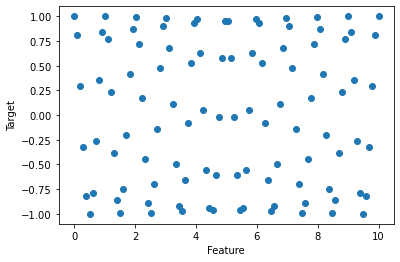

In [28]:
X = np.linspace(0.0, 10.0,100)
y = np.cos(2 * np.pi * X)
plt.plot(X, y, 'o')
plt.plot(X, -3 * np.ones(len(X)), 'o')
plt.ylim(-1.1, 1.1)
plt.xlabel("Feature")
plt.ylabel("Target")

In [29]:
from numpy import array
XX=np.reshape(X, (len(X),-1))

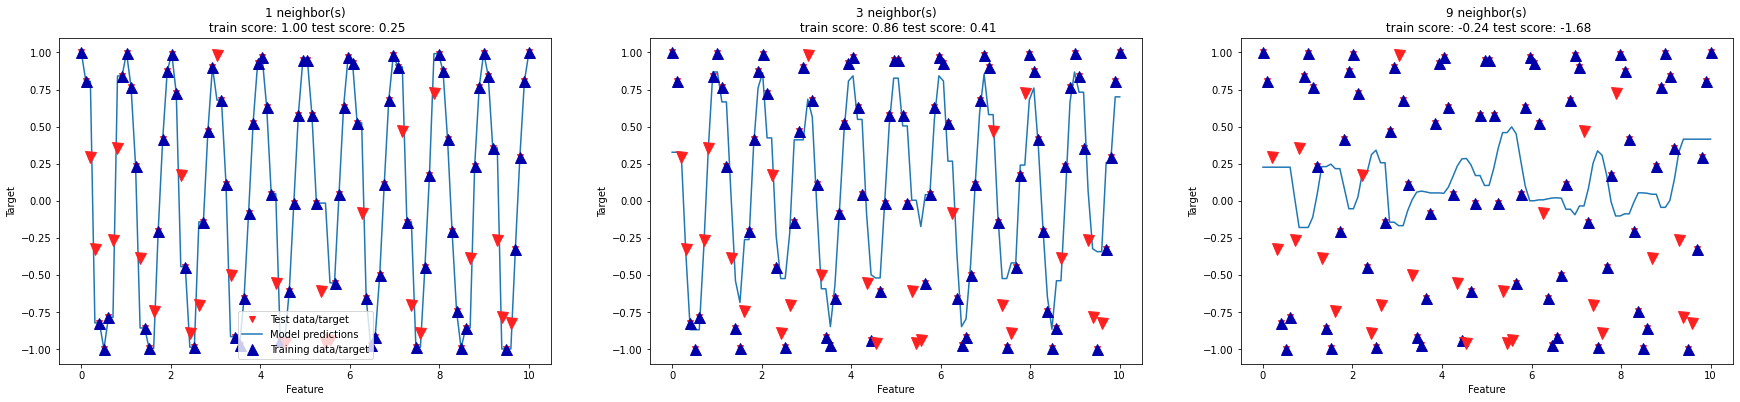

In [30]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, random_state=0)
fig, axes = plt.subplots(1, 3, figsize=(30, 6)) 
line = np.linspace(0, 10, len(XX)).reshape(len(XX), -1)
import pylab as plot #plt.suptitle("nearest_neighbor_regression")
params = {'legend.fontsize': 10, 'legend.handlelength': 2}
plot.rcParams.update(params)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3 or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(X, y, 'v',c=mglearn.cm2(1))
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train,'^',c=mglearn.cm2(0),markersize=11)
    ax.plot(X_test, y_test,'v',c=mglearn.cm2(1),markersize=11)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,reg.score(X_train, y_train),
                                                                         reg.score(X_test,y_test)))    
    ax.set_xlabel("Feature")  
    ax.set_ylabel("Target")         
axes[0].legend(["Test data/target","Model predictions","Training data/target"],loc='lower center')
pass

In [31]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,100,1):
    X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.25, random_state=seedN)
    training_accuracy = []  
    test_accuracy = []
    neighbors_settings = range(1, 60) # try n_neighbors from 1 to 10

    for n_neighbors in neighbors_settings:   
        reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model 
        reg.fit(X_train, y_train) #clf = KNeighborsClassifier(n_neighbors=n_neighbors    
        training_accuracy.append(reg.score(X_train, y_train)) # record training set accuracy  
        test_accuracy.append(reg.score(X_test, y_test)) # record generalization accuracy    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy
pass

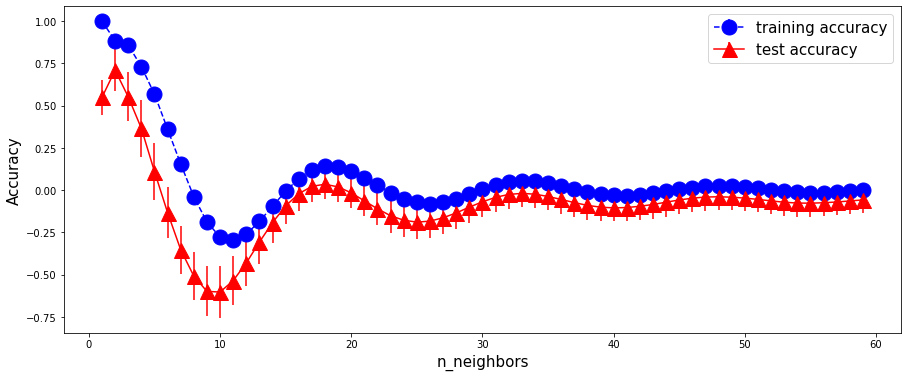

In [32]:
fig = plt.figure(figsize=(15, 6))
import pylab as plot
params = {'legend.fontsize': 15, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=15)
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1), label="test accuracy", color='red', marker='^', linestyle='-', markersize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xlabel("n_neighbors",fontsize=15)
plt.legend()

# Three Key points:

**1. Good data generally translates to good prediction.**

The unreasonable effectiveness of data (Alon Halevy, Peter Norvig, Fernando Pereira) -- Google's Research Director Peter Norvig claiming that "We don’t have better algorithms. We just have more data." 

 [https://www.researchgate.net/publication/224396640_The_Unreasonable_Effectiveness_of_Data]
 
 The above statement is supported by a research on*confusion set disambiguation,* which sounds fancy but just means that the model has to decide whether to fill in a blank in a sentence with T-O to, T-O-O too, or T-W-O two.

![scaling_corpora](https://user-images.githubusercontent.com/25600601/111666781-03a6f780-884f-11eb-933a-8d7753bf1fee.png)

 
*In a nutshell, there results indicate that simply increasing the amount of data improves every algorithm's generalization error. But, for large amounts of data, the improvements start becoming negligible. And unless the algorithm is very bad, they all settle down to some accuracy level.* 

   
**2. k-NN regression and classifier can only interpolate**

Again, kNN is an *instance based* algorithm and can only make predictions based on its corpora of data. For values outside the range of the training samples (max or min), it will fail.


**3. Single most important parameter is n_neighbors**

Scanning over the accuracy as a function of **n_neighbors** improves the effectiveness and reliability of the algorithm.

The optimal choice of the value **n_neighbors** is highly data-dependent: in general a larger **n_neighbors** suppresses the effects of noise, but makes the classification boundaries less distinct.


# Real World examples

# Example 1. Parkinsons Telemonitoring Data Set  

The dataset was created by Athanasios Tsanas (tsanasthanasis '@' gmail.com) and Max Little (littlem '@' physics.ox.ac.uk) of the University of Oxford, in collaboration with 10 medical centers in the US and Intel Corporation who developed the telemonitoring device to record the speech signals. The original study used a range of linear and nonlinear regression methods to predict the clinician's Parkinson's disease symptom score on the UPDRS scale.

**Your task: Predict clinician's Parkinson's disease symptom score on the UPDRS scale (the Target, UPDRS stands for Unified Parkinson's Disease Rating Scale).**

**Oxford Parkinson's Disease Telemonitoring Dataset**

============================================================

Data Set Characteristics:  Multivariate
Attribute Characteristics:  Integer, Real
Associated Tasks:  Regression
Number of Instances:  5875
Number of Attributes:  26
Area:  Life
Date Donated:  2009-10-29

============================================================

**DATA SET INFORMATION:**

This dataset is composed of a range of biomedical voice measurements from 42 
people with early-stage Parkinson's disease recruited to a six-month trial of 
a telemonitoring device for remote symptom progression monitoring. The 
recordings were automatically captured in the patient's homes.

Columns in the table contain subject number, subject age, subject gender, 
time interval from baseline recruitment date, total UPDRS, and 
16 biomedical voice measures. Each row corresponds to one of 5,875 voice 
recording from these individuals. The main aim of the data is to predict the 
total UPDRS scores ('total_UPDRS') from the 16 voice measures. UPDRS means 
Unified Parkinson's disease rating scale.

The data is in ASCII CSV format. The rows of the CSV file contain an instance 
corresponding to one voice recording. There are around 200 recordings per 
patient, the subject number of the patient is identified in the first column. 
For further information or to pass on comments, please contact Athanasios 
Tsanas (tsanasthanasis '@' gmail.com) or Max Little (littlem '@' 
physics.ox.ac.uk).

Further details are contained in the following reference -- if you use this 
dataset, please cite:
Athanasios Tsanas, Max A. Little, Patrick E. McSharry, Lorraine O. Ramig (2009),
'Accurate telemonitoring of Parkinson.s disease progression by non-invasive 
speech tests',
IEEE Transactions on Biomedical Engineering (to appear).

Further details about the biomedical voice measures can be found in:
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2009),
'Suitability of dysphonia measurements for telemonitoring of Parkinson's 
disease',
IEEE Transactions on Biomedical Engineering, 56(4):1015-1022 

 
===========================================================

**ATTRIBUTE INFORMATION:**

**subject#** - Integer that uniquely identifies each subject

**age** - Subject age

**sex** - Subject gender '0' - male, '1' - female

**test_time** - Time since recruitment into the trial. The integer part is the 
number of days since recruitment.   

**Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP** - Several measures of 
variation in fundamental frequency  

**Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA** - 
Several measures of variation in amplitude, Clinician's motor score  

**NHR,HNR** - Two measures of ratio of noise to tonal components in the voice

**RPDE** - A nonlinear dynamical complexity measure

**DFA** - Signal fractal scaling exponent

**PPE** - A nonlinear measure of fundamental frequency variation 

**Target-total_UPDRS** - Clinician's total UPDRS score, linearly interpolated

===========================================================

RELEVANT PAPERS:

Little MA, McSharry PE, Hunter EJ, Ramig LO (2009), 'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', IEEE Transactions on Biomedical Engineering, 56(4):1015-1022

Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. 'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', BioMedical Engineering OnLine 2007, 6:23 (26 June 2007) 

===========================================================

CITATION REQUEST:

If you use this dataset, please cite the following paper: A Tsanas, MA Little, PE McSharry, LO Ramig (2009)
'Accurate telemonitoring of Parkinson.s disease progression by non-invasive 
speech tests', IEEE Transactions on Biomedical Engineering (to appear). 

In [33]:
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [34]:
# from google.colab import drive
# # drive.mount('/content/drive')

In [35]:
data_dir = './'

In [36]:
df_parkinsons = pd.read_excel(data_dir+'parkinsons_updrs.xlsx', sheet_name="parkinsons_updrs")
dummy=df_parkinsons
dummy.head(5)

,subject#,age,sex,test_time,motor_score,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,Target
0,1,72,0,5.6431,28.199,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,34.398
1,1,72,0,12.6660,28.447,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,34.894
2,1,72,0,19.6810,28.695,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,35.389
3,1,72,0,25.6470,28.905,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,35.810
4,1,72,0,33.6420,29.187,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,36.375


In [37]:
df_parkinsons.shape #Size of data

(5875, 22)

In [38]:
df_features=dummy.drop('Target', axis=1) #Remove the target column X
df_features=df_features.drop('motor_score', axis=1) #Remove the motor_score column
len(df_features)
df_features.head(5)

,subject#,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [39]:
all_training = pd.DataFrame()
all_test = pd.DataFrame()
for seedN in range(1,20,1):
    X_train, X_test, y_train, y_test = train_test_split(df_features, df_parkinsons['Target'], test_size=0.25, random_state=seedN)
    training_accuracy = []  
    test_accuracy = []
    neighbors_settings = range(1, 30) # try n_neighbors from 1 to 10

    for n_neighbors in neighbors_settings:   
        reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model 
        reg.fit(X_train, y_train) #clf = KNeighborsClassifier(n_neighbors=n_neighbors    
        training_accuracy.append(reg.score(X_train, y_train)) # record training set accuracy  
        test_accuracy.append(reg.score(X_test, y_test)) # record generalization accuracy    
    all_training[seedN]=training_accuracy
    all_test[seedN] = test_accuracy

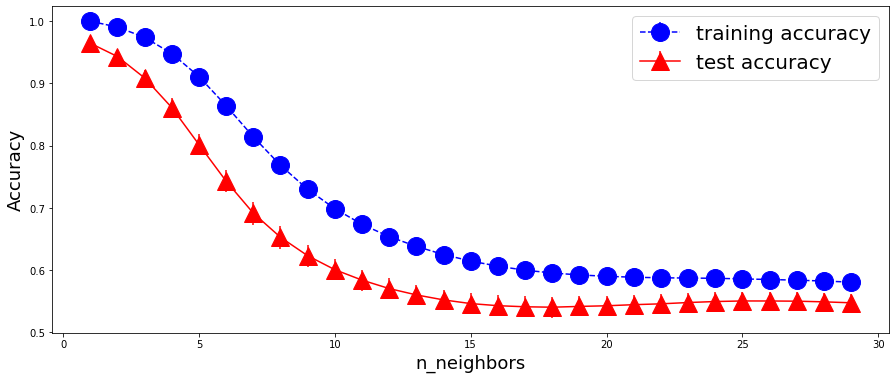

In [40]:
fig = plt.figure(figsize=(15, 6))
import pylab as plot
params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(neighbors_settings, all_training.mean(axis=1),
             yerr=all_training.std(axis=1), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=18)
plt.errorbar(neighbors_settings, all_test.mean(axis=1),
             yerr=all_test.std(axis=1), label="test accuracy", color='red', marker='^', linestyle='-', markersize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()

0.9625297621153459


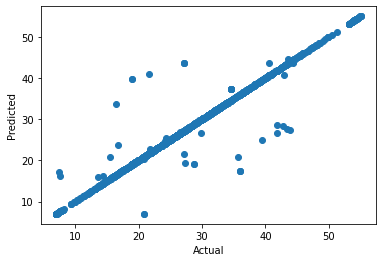

In [41]:
from sklearn.metrics import r2_score

reg = KNeighborsRegressor(n_neighbors=1)
X_train, X_test, y_train, y_test = train_test_split(df_features, df_parkinsons['Target'], test_size=0.25, random_state=seedN)
reg.fit(X_train, y_train)

plt.plot( y_test, reg.predict(X_test), 'o')

plt.xlabel("Actual")
plt.ylabel("Predicted")

print(r2_score(y_test, reg.predict(X_test)))

In [42]:
all_test.mean (axis=1) #See R2 for n_neighbors = 1 to 9

0     0.964591
1     0.943174
2     0.908711
3     0.861046
4     0.801573
5     0.742660
6     0.691248
7     0.652409
8     0.622718
9     0.600260
10    0.583481
11    0.569893
12    0.559674
13    0.551654
14    0.545729
15    0.542336
16    0.540572
17    0.539891
18    0.541158
19    0.542180
20    0.543956
21    0.545310
22    0.547399
23    0.549022
24    0.549929
25    0.549886
26    0.549571
27    0.548511
28    0.546962
dtype: float64

Notice that the best $R^2$ is achieved with **n_neighbors = 1**. The data also indicates high predictability of Parkinson's disease based on the variables provided.

# Example 2: Bike Sharing 

A bike-sharing system is a new generation of traditional bike rentals where the whole process (from membership, rental, and return back) has become automatic. Through this system, a user is able to easily rent a bike from a particular position and return it back at another location. Currently, there are about over 500 bike-sharing programs around the world, composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental, and health issues. 

Apart from interesting real-world applications of bike sharing systems, the characteristics of data generated by these systems make them attractive for research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing systems into virtual sensor networks that can be used for sensing mobility in the city. Hence, it is expected that most important events in the city could be detected by monitoring these data.


**Attribute Information:**

**instant:** record index  
**dteday :** date  
**season :** season (1:springer, 2:summer, 3:fall, 4:winter)  
**yr :** year (0: 2011, 1:2012)  
**mnth :** month ( 1 to 12)  
**holiday :** weather day is holiday or not (extracted from [Web Link])  
**weekday :** day of the week  
**workingday :** if day is neither weekend nor holiday is 1, otherwise is 0.  
**weathersit :**   
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
**temp :** Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)  
**atemp:** Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)  
**hum:** Normalized humidity. The values are divided to 100 (max)  
**windspeed:** Normalized wind speed. The values are divided to 67 (max)  
**Target = count:** count of total rental bikes including both casual and registered  

The dataset was sourced from Hadi Fanaee of Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto , INESC Porto, Campus da FEUP, Rua Dr. Roberto Frias, 378, 4200 - 465 Porto, Portugal.  

Original Source: http://capitalbikeshare.com/system-data 
Weather Information: http://www.freemeteo.com 
Holiday Schedule: http://dchr.dc.gov/page/holiday-schedule


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [44]:
df_bikesharing = pd.read_excel(data_dir + 'Bike_Sharing.xlsx', sheet_name="day")
dummy=df_bikesharing
dummy.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


Let's look at the histogram first.

Text(0.5, 0, 'Number of bikes borrowed')

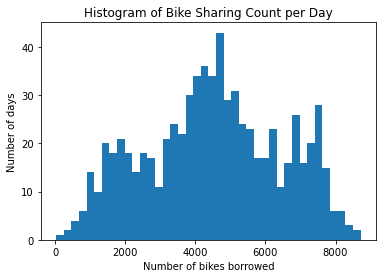

In [45]:
# a. plot the histogram of bike sharing count per day
dummy.hist(column='count', grid=False, bins=40)
plt.title('Histogram of Bike Sharing Count per Day')
plt.ylabel('Number of days')
plt.xlabel('Number of bikes borrowed')

In [46]:
df_features=dummy.drop('count', axis=1) #Remove the target column = 'count' of bikes borrowed in a given day
df_features=df_features.drop('instant', axis=1)
df_features=df_features.drop('dteday', axis=1)
len(df_features)
df_features.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900


In [47]:
all_training = pd.DataFrame()
all_test = pd.DataFrame()
for seedN in range(1,20,1):
    X_train, X_test, y_train, y_test = train_test_split(df_features, df_bikesharing['count'], test_size=0.25, random_state=seedN)
    training_accuracy = []  
    test_accuracy = []
    neighbors_settings = range(1, 11) # try n_neighbors from 1 to 10

    for n_neighbors in neighbors_settings:   
        reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model 
        reg.fit(X_train, y_train) #clf = KNeighborsClassifier(n_neighbors=n_neighbors    
        training_accuracy.append(reg.score(X_train, y_train)) # record training set accuracy  
        test_accuracy.append(reg.score(X_test, y_test)) # record generalization accuracy    
    all_training[seedN]=training_accuracy
    all_test[seedN] = test_accuracy

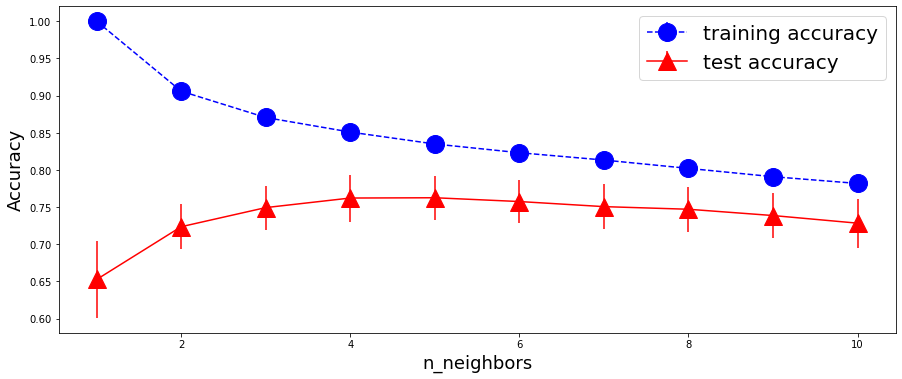

In [48]:
fig = plt.figure(figsize=(15, 6))
import pylab as plot
params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(neighbors_settings, all_training.mean(axis=1),
             yerr=all_training.std(axis=1), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=18)
plt.errorbar(neighbors_settings, all_test.mean(axis=1),
             yerr=all_test.std(axis=1), label="test accuracy", color='red', marker='^', linestyle='-', markersize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()

In [49]:
all_test.mean(axis=1)

0    0.652674
1    0.723635
2    0.749341
3    0.762213
4    0.762586
5    0.757500
6    0.750658
7    0.747123
8    0.738671
9    0.728414
dtype: float64

Notice that the best $R^2$ is achieved with **n_neighbors = 5**. 

0.7648429938739908


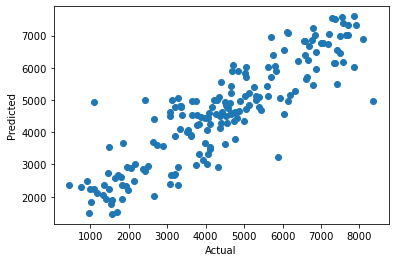

In [50]:
from sklearn.metrics import r2_score

reg = KNeighborsRegressor(n_neighbors=5)
X_train, X_test, y_train, y_test = train_test_split(df_features, df_bikesharing['count'], test_size=0.25, random_state=5)
reg.fit(X_train, y_train)

plt.plot( y_test, reg.predict(X_test), 'o')

plt.xlabel("Actual")
plt.ylabel("Predicted")

print(r2_score(y_test, reg.predict(X_test)))

## End.


# Homework 2 per SLT.  75% kNN Regressor (10 pts, due 30 July 2021, 10:00 pm)

Find a data set (not discussed here) that can achieved $R^2=$75% accuracy using k-NN (test set, use 20 trials at least). Prepare for a 3 minute slide presentation of your use case in the recitation class on 02 August. Same grade for every member of SLT. Perfect score (10/10) for >75% and -1 for every 1% decline in test accuracy, e.g. if your accuracy is 73.1% you will get 8/10. 


